In [1]:
#%matplotlib notebook
import numpy as np
from scipy.stats import genexpon
import matplotlib.pyplot as plt
from numpy.random import RandomState
import pandas as pd
import datetime
import openqtsim

# EV Ratios

In [2]:
Total_EV_Number = 300
EV_Number_Com_Feeder = int(Total_EV_Number * 0.9) #90%
EV_Number_Res_Feeder = int(Total_EV_Number * 0.1) #10%

# Commercial Feeder
EV_Number_Com_Feeder_Mor_Arr = int(EV_Number_Com_Feeder * 0.6) #60%
EV_Number_Com_Feeder_Even_Arr = int(EV_Number_Com_Feeder * 0.4) #40%

BEV_Number_Com_Feeder = int(EV_Number_Com_Feeder * 0.4) #40%
PHEV_Number_Com_Feeder = int(EV_Number_Com_Feeder * 0.6) #60%

# Residential Feeder
EV_Number_Res_Feeder_Even_Arr = int(EV_Number_Res_Feeder * 1) #100%

BEV_Number_Res_Feeder = int(EV_Number_Res_Feeder * 0.4) #40%
PHEV_Number_Res_Feeder = int(EV_Number_Res_Feeder * 0.6) #60%



# Data Generator (Commercial Arrival/Departure)

## Morning Arrival Commercial Feeders

<Figure size 432x288 with 0 Axes>

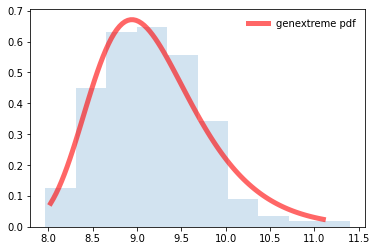

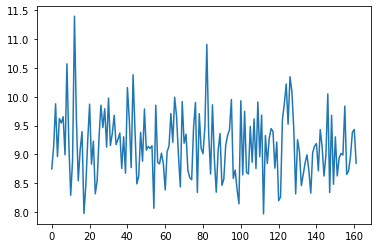

In [3]:
from scipy.stats import genextreme

genloc=8.9068    #Shift
genscale=0.5492  #Scale
genc=0.0629  #Shape

x = np.linspace(genextreme.ppf(0.01, genc,loc=genloc,scale=genscale),
                genextreme.ppf(0.99, genc,loc=genloc,scale=genscale), 100)

genvalmarr = genextreme.rvs(genc, loc = genloc, scale=genscale, size=EV_Number_Com_Feeder_Mor_Arr)
plt.figure()
fig, ax = plt.subplots(1, 1)
ax.plot(x, genextreme.pdf(x, genc,loc=genloc,scale=genscale),
       'r-', lw=5, alpha=0.6, label='genextreme pdf')
ax.hist(genvalmarr, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()
plt.figure()
plt.plot(genvalmarr)
plt.show()

## Evening Arrivals Commercial feeders 

<Figure size 432x288 with 0 Axes>

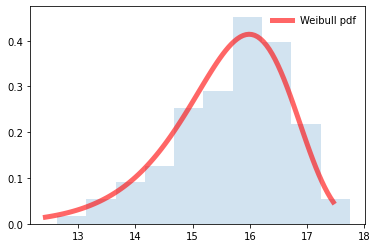

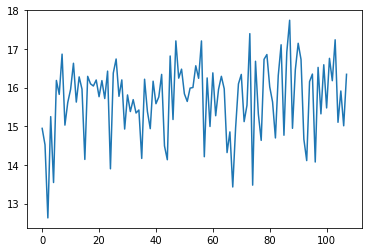

In [4]:
from scipy.stats import weibull_min

genscale3= 16.0386 #Scale 16.0386 
genc3=18.0225  #Shape 18.0225
x3 = np.linspace(weibull_min.ppf(0.01, genc3 ,scale=genscale3),
                weibull_min.ppf(0.99, genc3 ,scale=genscale3), 100)

WeibullValEvnArr = weibull_min.rvs(genc3, scale=genscale3, size=EV_Number_Com_Feeder_Even_Arr)
plt.figure()
fig, ax = plt.subplots(1, 1)
ax.plot(x3, weibull_min.pdf(x3, genc3,scale=genscale3),
       'r-', lw=5, alpha=0.6, label='Weibull pdf')
ax.hist(WeibullValEvnArr, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()
plt.figure()
plt.plot(WeibullValEvnArr)
plt.show()

# Data Generator (Residential Arrival/Departure)

## Evening Arrival Residential feeder 

<Figure size 432x288 with 0 Axes>

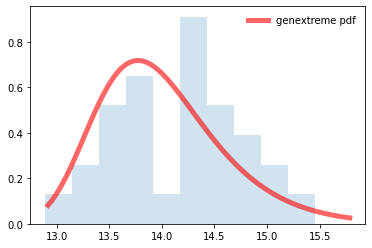

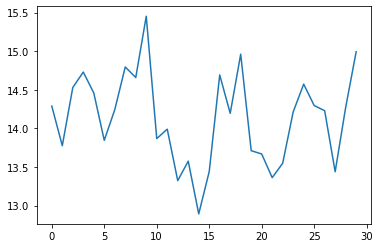

In [5]:
from scipy.stats import genextreme

genloc4= 13.7393    #Shift
genscale4= 0.5129 #Scale
genc4= 0.0631 #Shape

x4 = np.linspace(genextreme.ppf(0.01, genc4 ,loc=genloc4 ,scale=genscale4),
                genextreme.ppf(0.99, genc4 ,loc=genloc4,scale=genscale4), 100)

genvalEvArr = genextreme.rvs(genc4, loc = genloc4, scale=genscale4, size=EV_Number_Res_Feeder_Even_Arr)
plt.figure()
fig, ax = plt.subplots(1, 1)
ax.plot(x4, genextreme.pdf(x4, genc4,loc=genloc4,scale=genscale4),
       'r-', lw=5, alpha=0.6, label='genextreme pdf')
ax.hist(genvalEvArr, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()
plt.figure()
plt.plot(genvalEvArr)
plt.show()

# Data Generator (Commercial/Residential Travel Distance)

<Figure size 432x288 with 0 Axes>

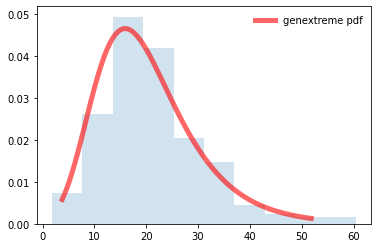

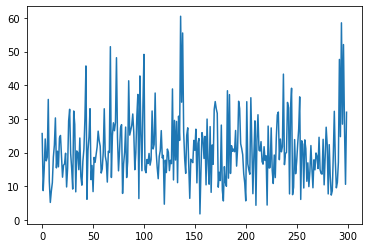

In [6]:
from scipy.stats import genextreme

genloc6= 15.8820
genscale6= 7.9015 
genc6= 0.00474

x6 = np.linspace(genextreme.ppf(0.01, genc6 ,loc=genloc6 ,scale=genscale6),
                genextreme.ppf(0.99, genc6 ,loc=genloc6,scale=genscale6), 100)

genvalDistance= genextreme.rvs(genc6, loc = genloc6, scale=genscale6, size=Total_EV_Number)
#genvalDistance=pd.Series((genvalDistance/1.609))
#genvalDistance=genvalDistance.round(decimals=2)
plt.figure()
fig, ax = plt.subplots(1, 1)
ax.plot(x6, genextreme.pdf(x6, genc6,loc=genloc6,scale=genscale6),
       'r-', lw=5, alpha=0.6, label='genextreme pdf')
ax.hist(genvalDistance, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()
plt.figure()
plt.plot(genvalDistance)
plt.show()

# Data Frame Creation

In [7]:
# Convert the numbers into datetime.time
def number_to_datetime(number):
    if not isinstance(number[-1], datetime.time):#isinstance is for comparing datatype
        result=[]
        for val in number:
            temp = str(datetime.timedelta(hours=val))
            result.append(temp)
        del number
        number = pd.to_datetime(result, format='%H:%M:%S.%f').time
    return number

genvalmarr = number_to_datetime(genvalmarr)
WeibullValEvnArr = number_to_datetime(WeibullValEvnArr)
genvalEvArr = number_to_datetime(genvalEvArr)

In [8]:
Arrival_Times = genvalmarr
Arrival_Times=np.append(Arrival_Times,WeibullValEvnArr)
Arrival_Times=np.append(Arrival_Times,genvalEvArr)

df=pd.DataFrame({'Arrival Time': Arrival_Times,
                 'Distance Traveled': genvalDistance,  
                })

df["Feeder"] = np.nan
df["Feeder"] = df["Feeder"].loc[0:genvalmarr.shape[0]+WeibullValEvnArr.shape[0]].fillna("Commercial")
df["Feeder"] = df["Feeder"].fillna("Residential")

df["Time of Day"] = np.nan
df["Time of Day"] = df["Time of Day"].loc[0:genvalmarr.shape[0]].fillna("Morning")
df["Time of Day"] = df["Time of Day"].fillna("Evening")

df.to_excel('EVbehaviour.xlsx')

# Merge PowerTrain Simulations with Probability Data 

## (BEVs) Commercial @ UDDS

In [9]:
Total_BEV_Data = 6
# Commercial Feeder
Samples_Per_BEV_Commercial = int(BEV_Number_Com_Feeder/Total_BEV_Data)
# Residential Feeder
Samples_Per_BEV_Residential = int(BEV_Number_Res_Feeder/Total_BEV_Data)

In [10]:
# BEV 1
dfv = pd.read_excel('(BEV) Full Discharge 2016 CHEVROLET Spark EV UDDS.xlsx',
                    index_col=0)
dfv['distance'] = dfv['distance'] * 1.609  # Convert miles to km
maxEnergy = dfv.essCurKwh[0]
dfv['ChgEnergyReq'] = maxEnergy - dfv['essCurKwh']
del dfv['mpsAch']
del dfv['essKwOutAch']
del dfv['speed']
# Use the distance from generated data and find closest distance in
# powertrain simulations, merge the resulting DataFrame to the main
# DataFrame to Get SOC on the respective random distance.
tempind = []
for inter, x in enumerate(
        df['Distance Traveled'].loc[0:Samples_Per_BEV_Commercial - 1]):
    tempind.append(dfv['distance'].sub(x).abs().idxmin())

dfv = dfv.loc[tempind]
dfv = dfv.reset_index()
del dfv['index']
dfv["Type of EV"] = "BEV"
dfv["Model"] = "2016 CHEVROLET Spark EV"

df_BEV_Commercial_1 = df.loc[0:Samples_Per_BEV_Commercial -
                             1].reset_index(drop=True).join(dfv)

# BEV 2
dfv = pd.read_excel('(BEV) Full Discharge 2016 Leaf 24 kWh UDDS.xlsx',
                    index_col=0)
dfv['distance'] = dfv['distance'] * 1.609  # Convert miles to km
maxEnergy = dfv.essCurKwh[0]
dfv['ChgEnergyReq'] = maxEnergy - dfv['essCurKwh']
del dfv['mpsAch']
del dfv['essKwOutAch']
del dfv['speed']
# Use the distance from generated data and find closest distance in
# powertrain simulations, merge the resulting DataFrame to the main
# DataFrame to Get SOC on the respective random distance.
tempind = []
for inter, x in enumerate(
        df['Distance Traveled'].
        loc[Samples_Per_BEV_Commercial:Samples_Per_BEV_Commercial * 2 - 1]):
    tempind.append(dfv['distance'].sub(x).abs().idxmin())

dfv = dfv.loc[tempind]
dfv = dfv.reset_index()
del dfv['index']
dfv["Type of EV"] = "BEV"
dfv["Model"] = "2016 Nissan Leaf 24kWh"

df_BEV_Commercial_2 = df.loc[
    Samples_Per_BEV_Commercial:Samples_Per_BEV_Commercial * 2 -
    1].reset_index(drop=True).join(dfv)

# BEV 3
dfv = pd.read_excel('(BEV) Full Discharge 2016 MITSUBISHI i-MiEV UDDS.xlsx',
                    index_col=0)
dfv['distance'] = dfv['distance'] * 1.609  # Convert miles to km
maxEnergy = dfv.essCurKwh[0]
dfv['ChgEnergyReq'] = maxEnergy - dfv['essCurKwh']
del dfv['mpsAch']
del dfv['essKwOutAch']
del dfv['speed']
# Use the distance from generated data and find closest distance in
# powertrain simulations, merge the resulting DataFrame to the main
# DataFrame to Get SOC on the respective random distance.
tempind = []
for inter, x in enumerate(
        df['Distance Traveled'].loc[Samples_Per_BEV_Commercial *
                                    2:Samples_Per_BEV_Commercial * 3 - 1]):
    tempind.append(dfv['distance'].sub(x).abs().idxmin())

dfv = dfv.loc[tempind]
dfv = dfv.reset_index()
del dfv['index']
dfv["Type of EV"] = "BEV"
dfv["Model"] = "2016 MITSUBISHI i-MiEV"

df_BEV_Commercial_3 = df.loc[Samples_Per_BEV_Commercial *
                             2:Samples_Per_BEV_Commercial * 3 -
                             1].reset_index(drop=True).join(dfv)

# BEV 4
dfv = pd.read_excel('(BEV) Full Discharge 2016 Nissan Leaf 30 kWh UDDS.xlsx',
                    index_col=0)
dfv['distance'] = dfv['distance'] * 1.609  # Convert miles to km
maxEnergy = dfv.essCurKwh[0]
dfv['ChgEnergyReq'] = maxEnergy - dfv['essCurKwh']
del dfv['mpsAch']
del dfv['essKwOutAch']
del dfv['speed']
# Use the distance from generated data and find closest distance in
# powertrain simulations, merge the resulting DataFrame to the main
# DataFrame to Get SOC on the respective random distance.
tempind = []
for inter, x in enumerate(
        df['Distance Traveled'].loc[Samples_Per_BEV_Commercial *
                                    3:Samples_Per_BEV_Commercial * 4 - 1]):
    tempind.append(dfv['distance'].sub(x).abs().idxmin())

dfv = dfv.loc[tempind]
dfv = dfv.reset_index()
del dfv['index']
dfv["Type of EV"] = "BEV"
dfv["Model"] = "2016 Nissan Leaf 30 kWh"

df_BEV_Commercial_4 = df.loc[Samples_Per_BEV_Commercial *
                             3:Samples_Per_BEV_Commercial * 4 -
                             1].reset_index(drop=True).join(dfv)

# BEV 5
dfv = pd.read_excel('(BEV) Full Discharge 2016 TESLA Model S60 2WD UDDS.xlsx',
                    index_col=0)
dfv['distance'] = dfv['distance'] * 1.609  # Convert miles to km
maxEnergy = dfv.essCurKwh[0]
dfv['ChgEnergyReq'] = maxEnergy - dfv['essCurKwh']
del dfv['mpsAch']
del dfv['essKwOutAch']
del dfv['speed']
# Use the distance from generated data and find closest distance in
# powertrain simulations, merge the resulting DataFrame to the main
# DataFrame to Get SOC on the respective random distance.
tempind = []
for inter, x in enumerate(
        df['Distance Traveled'].loc[Samples_Per_BEV_Commercial *
                                    4:Samples_Per_BEV_Commercial * 5 - 1]):
    tempind.append(dfv['distance'].sub(x).abs().idxmin())

dfv = dfv.loc[tempind]
dfv = dfv.reset_index()
del dfv['index']
dfv["Type of EV"] = "BEV"
dfv["Model"] = "2016 TESLA Model S60 2WD"

df_BEV_Commercial_5 = df.loc[Samples_Per_BEV_Commercial *
                             4:Samples_Per_BEV_Commercial * 5 -
                             1].reset_index(drop=True).join(dfv)

# BEV 6
dfv = pd.read_excel('(BEV) Full Discharge 2017 CHEVROLET Bolt UDDS.xlsx',
                    index_col=0)
dfv['distance'] = dfv['distance'] * 1.609  # Convert miles to km
maxEnergy = dfv.essCurKwh[0]
dfv['ChgEnergyReq'] = maxEnergy - dfv['essCurKwh']
del dfv['mpsAch']
del dfv['essKwOutAch']
del dfv['speed']
# Use the distance from generated data and find closest distance in
# powertrain simulations, merge the resulting DataFrame to the main
# DataFrame to Get SOC on the respective random distance.
tempind = []
for inter, x in enumerate(
        df['Distance Traveled'].loc[Samples_Per_BEV_Commercial *
                                    5:Samples_Per_BEV_Commercial * 6 - 1]):
    tempind.append(dfv['distance'].sub(x).abs().idxmin())

dfv = dfv.loc[tempind]
dfv = dfv.reset_index()
del dfv['index']
dfv["Type of EV"] = "BEV"
dfv["Model"] = "2017 CHEVROLET Bolt"

df_BEV_Commercial_6 = df.loc[Samples_Per_BEV_Commercial *
                             5:Samples_Per_BEV_Commercial * 6 -
                             1].reset_index(drop=True).join(dfv)

df_BEV_Commercial = pd.concat([
    df_BEV_Commercial_1, df_BEV_Commercial_2, df_BEV_Commercial_3,
    df_BEV_Commercial_4, df_BEV_Commercial_5, df_BEV_Commercial_6
],
                              ignore_index=True)

## (PHEV) Commercial @ UDDS

In [11]:
Total_PHEV_Data = 5
# Commercial Feeder
Samples_Per_PHEV_Commercial = int(PHEV_Number_Com_Feeder/Total_PHEV_Data)
# Residential Feeder
Samples_Per_PHEV_Residential = int(PHEV_Number_Res_Feeder/Total_PHEV_Data)

In [12]:
Base_index = df_BEV_Commercial.shape[0]
# PHEV 1
dfv = pd.read_excel('(PHEV) Full Discharge 2016 BMW i3 REx PHEV UDDS.xlsx',
                    index_col=0)
dfv['distance'] = dfv['distance'] * 1.609  # Convert miles to km
maxEnergy = dfv.essCurKwh[0]
dfv['ChgEnergyReq'] = maxEnergy - dfv['essCurKwh']
del dfv['mpsAch']
del dfv['essKwOutAch']
del dfv['speed']
# Use the distance from generated data and find closest distance in
# powertrain simulations, merge the resulting DataFrame to the main
# DataFrame to Get SOC on the respective random distance.
tempind = []
for inter, x in enumerate(
        df['Distance Traveled'].loc[Base_index:Base_index+Samples_Per_PHEV_Commercial - 1]):
    tempind.append(dfv['distance'].sub(x).abs().idxmin())

dfv = dfv.loc[tempind]
dfv = dfv.reset_index()
del dfv['index']
dfv["Type of EV"] = "PHEV"
dfv["Model"] = "2016 BMW i3 REx PHEV"

df_PHEV_Commercial_1 = df.loc[Base_index:Base_index+Samples_Per_PHEV_Commercial -
                             1].reset_index(drop=True).join(dfv)

# PHEV 2
dfv = pd.read_excel('(PHEV) Full Discharge 2016 CHEVROLET Volt UDDS.xlsx',
                    index_col=0)
dfv['distance'] = dfv['distance'] * 1.609  # Convert miles to km
maxEnergy = dfv.essCurKwh[0]
dfv['ChgEnergyReq'] = maxEnergy - dfv['essCurKwh']
del dfv['mpsAch']
del dfv['essKwOutAch']
del dfv['speed']
# Use the distance from generated data and find closest distance in
# powertrain simulations, merge the resulting DataFrame to the main
# DataFrame to Get SOC on the respective random distance.
tempind = []
for inter, x in enumerate(
        df['Distance Traveled'].
        loc[Base_index+Samples_Per_PHEV_Commercial:Base_index+Samples_Per_PHEV_Commercial * 2 - 1]):
    tempind.append(dfv['distance'].sub(x).abs().idxmin())

dfv = dfv.loc[tempind]
dfv = dfv.reset_index()
del dfv['index']
dfv["Type of EV"] = "PHEV"
dfv["Model"] = "2016 CHEVROLET Volt"

df_PHEV_Commercial_2 = df.loc[
    Base_index+Samples_Per_PHEV_Commercial:Base_index+Samples_Per_PHEV_Commercial * 2 -
    1].reset_index(drop=True).join(dfv)

# PHEV 3
dfv = pd.read_excel('(PHEV) Full Discharge 2016 FORD C-MAX (PHEV) UDDS.xlsx',
                    index_col=0)
dfv['distance'] = dfv['distance'] * 1.609  # Convert miles to km
maxEnergy = dfv.essCurKwh[0]
dfv['ChgEnergyReq'] = maxEnergy - dfv['essCurKwh']
del dfv['mpsAch']
del dfv['essKwOutAch']
del dfv['speed']
# Use the distance from generated data and find closest distance in
# powertrain simulations, merge the resulting DataFrame to the main
# DataFrame to Get SOC on the respective random distance.
tempind = []
for inter, x in enumerate(
        df['Distance Traveled'].loc[Base_index+Samples_Per_PHEV_Commercial *
                                    2:Base_index+Samples_Per_PHEV_Commercial * 3 - 1]):
    tempind.append(dfv['distance'].sub(x).abs().idxmin())

dfv = dfv.loc[tempind]
dfv = dfv.reset_index()
del dfv['index']
dfv["Type of EV"] = "PHEV"
dfv["Model"] = "FORD C-MAX (PHEV)"

df_PHEV_Commercial_3 = df.loc[Base_index+Samples_Per_PHEV_Commercial *
                             2:Base_index+Samples_Per_PHEV_Commercial * 3 -
                             1].reset_index(drop=True).join(dfv)

# PHEV 4
dfv = pd.read_excel('(PHEV) Full Discharge 2016 HYUNDAI Sonata PHEV UDDS.xlsx',
                    index_col=0)
dfv['distance'] = dfv['distance'] * 1.609  # Convert miles to km
maxEnergy = dfv.essCurKwh[0]
dfv['ChgEnergyReq'] = maxEnergy - dfv['essCurKwh']
del dfv['mpsAch']
del dfv['essKwOutAch']
del dfv['speed']
# Use the distance from generated data and find closest distance in
# powertrain simulations, merge the resulting DataFrame to the main
# DataFrame to Get SOC on the respective random distance.
tempind = []
for inter, x in enumerate(
        df['Distance Traveled'].loc[Base_index+Samples_Per_PHEV_Commercial *
                                    3:Base_index+Samples_Per_PHEV_Commercial * 4 - 1]):
    tempind.append(dfv['distance'].sub(x).abs().idxmin())

dfv = dfv.loc[tempind]
dfv = dfv.reset_index()
del dfv['index']
dfv["Type of EV"] = "PHEV"
dfv["Model"] = "2016 HYUNDAI Sonata PHEV"

df_PHEV_Commercial_4 = df.loc[Base_index+Samples_Per_PHEV_Commercial *
                             3:Base_index+Samples_Per_PHEV_Commercial * 4 -
                             1].reset_index(drop=True).join(dfv)

# PHEV 5 (Not Even Thats Y not Matching, Manually adding 2 more samples for this)
dfv = pd.read_excel('(PHEV) Full Discharge 2017 Prius Prime UDDS.xlsx',
                    index_col=0)
dfv['distance'] = dfv['distance'] * 1.609  # Convert miles to km
maxEnergy = dfv.essCurKwh[0]
dfv['ChgEnergyReq'] = maxEnergy - dfv['essCurKwh']
del dfv['mpsAch']
del dfv['essKwOutAch']
del dfv['speed']
# Use the distance from generated data and find closest distance in
# powertrain simulations, merge the resulting DataFrame to the main
# DataFrame to Get SOC on the respective random distance.
tempind = []
for inter, x in enumerate(
        df['Distance Traveled'].loc[Base_index+Samples_Per_PHEV_Commercial *
                                    4:Base_index+Samples_Per_PHEV_Commercial * 5 + 1]):
    tempind.append(dfv['distance'].sub(x).abs().idxmin())

dfv = dfv.loc[tempind]
dfv = dfv.reset_index()
del dfv['index']
dfv["Type of EV"] = "PHEV"
dfv["Model"] = "2017 Prius Prime"

df_PHEV_Commercial_5 = df.loc[Base_index+Samples_Per_PHEV_Commercial *
                             4:Base_index+Samples_Per_PHEV_Commercial * 5 +
                             1].reset_index(drop=True).join(dfv)


df_PHEV_Commercial = pd.concat([
    df_PHEV_Commercial_1, df_PHEV_Commercial_2, df_PHEV_Commercial_3,
    df_PHEV_Commercial_4, df_PHEV_Commercial_5
],
                              ignore_index=True)

## (BEV) Residential @ UDDS

In [13]:
Base_index = df_BEV_Commercial.shape[0]+df_PHEV_Commercial.shape[0]

# BEV 1
dfv = pd.read_excel('(BEV) Full Discharge 2016 CHEVROLET Spark EV UDDS.xlsx',
                    index_col=0)
dfv['distance'] = dfv['distance'] * 1.609  # Convert miles to km
maxEnergy = dfv.essCurKwh[0]
dfv['ChgEnergyReq'] = maxEnergy - dfv['essCurKwh']
del dfv['mpsAch']
del dfv['essKwOutAch']
del dfv['speed']
# Use the distance from generated data and find closest distance in
# powertrain simulations, merge the resulting DataFrame to the main
# DataFrame to Get SOC on the respective random distance.
tempind = []
for inter, x in enumerate(
        df['Distance Traveled'].loc[Base_index:Base_index+Samples_Per_BEV_Residential - 1]):
    tempind.append(dfv['distance'].sub(x).abs().idxmin())

dfv = dfv.loc[tempind]
dfv = dfv.reset_index()
del dfv['index']
dfv["Type of EV"] = "BEV"
dfv["Model"] = "2016 CHEVROLET Spark EV"

df_BEV_Residential_1 = df.loc[Base_index:Base_index+Samples_Per_BEV_Residential -
                              1].reset_index(drop=True).join(dfv)

# BEV 2
dfv = pd.read_excel('(BEV) Full Discharge 2016 Leaf 24 kWh UDDS.xlsx',
                    index_col=0)
dfv['distance'] = dfv['distance'] * 1.609  # Convert miles to km
maxEnergy = dfv.essCurKwh[0]
dfv['ChgEnergyReq'] = maxEnergy - dfv['essCurKwh']
del dfv['mpsAch']
del dfv['essKwOutAch']
del dfv['speed']
# Use the distance from generated data and find closest distance in
# powertrain simulations, merge the resulting DataFrame to the main
# DataFrame to Get SOC on the respective random distance.
tempind = []
for inter, x in enumerate(
        df['Distance Traveled'].
        loc[Base_index+Samples_Per_BEV_Residential:Base_index+Samples_Per_BEV_Residential * 2 - 1]):
    tempind.append(dfv['distance'].sub(x).abs().idxmin())

dfv = dfv.loc[tempind]
dfv = dfv.reset_index()
del dfv['index']
dfv["Type of EV"] = "BEV"
dfv["Model"] = "2016 Nissan Leaf 24kWh"

df_BEV_Residential_2 = df.loc[
    Base_index+Samples_Per_BEV_Residential:Base_index+Samples_Per_BEV_Residential * 2 -
    1].reset_index(drop=True).join(dfv)

# BEV 3
dfv = pd.read_excel('(BEV) Full Discharge 2016 MITSUBISHI i-MiEV UDDS.xlsx',
                    index_col=0)
dfv['distance'] = dfv['distance'] * 1.609  # Convert miles to km
maxEnergy = dfv.essCurKwh[0]
dfv['ChgEnergyReq'] = maxEnergy - dfv['essCurKwh']
del dfv['mpsAch']
del dfv['essKwOutAch']
del dfv['speed']
# Use the distance from generated data and find closest distance in
# powertrain simulations, merge the resulting DataFrame to the main
# DataFrame to Get SOC on the respective random distance.
tempind = []
for inter, x in enumerate(
        df['Distance Traveled'].loc[Base_index+Samples_Per_BEV_Residential *
                                    2:Base_index+Samples_Per_BEV_Residential * 3 - 1]):
    tempind.append(dfv['distance'].sub(x).abs().idxmin())

dfv = dfv.loc[tempind]
dfv = dfv.reset_index()
del dfv['index']
dfv["Type of EV"] = "BEV"
dfv["Model"] = "2016 MITSUBISHI i-MiEV"

df_BEV_Residential_3 = df.loc[Base_index+Samples_Per_BEV_Residential *
                              2:Base_index+Samples_Per_BEV_Residential * 3 -
                              1].reset_index(drop=True).join(dfv)

# BEV 4
dfv = pd.read_excel('(BEV) Full Discharge 2016 Nissan Leaf 30 kWh UDDS.xlsx',
                    index_col=0)
dfv['distance'] = dfv['distance'] * 1.609  # Convert miles to km
maxEnergy = dfv.essCurKwh[0]
dfv['ChgEnergyReq'] = maxEnergy - dfv['essCurKwh']
del dfv['mpsAch']
del dfv['essKwOutAch']
del dfv['speed']
# Use the distance from generated data and find closest distance in
# powertrain simulations, merge the resulting DataFrame to the main
# DataFrame to Get SOC on the respective random distance.
tempind = []
for inter, x in enumerate(
        df['Distance Traveled'].loc[Base_index+Samples_Per_BEV_Residential *
                                    3:Base_index+Samples_Per_BEV_Residential * 4 - 1]):
    tempind.append(dfv['distance'].sub(x).abs().idxmin())

dfv = dfv.loc[tempind]
dfv = dfv.reset_index()
del dfv['index']
dfv["Type of EV"] = "BEV"
dfv["Model"] = "2016 Nissan Leaf 30 kWh"

df_BEV_Residential_4 = df.loc[Samples_Per_BEV_Residential *
                              3:Samples_Per_BEV_Residential * 4 -
                              1].reset_index(drop=True).join(dfv)

# BEV 5
dfv = pd.read_excel('(BEV) Full Discharge 2016 TESLA Model S60 2WD UDDS.xlsx',
                    index_col=0)
dfv['distance'] = dfv['distance'] * 1.609  # Convert miles to km
maxEnergy = dfv.essCurKwh[0]
dfv['ChgEnergyReq'] = maxEnergy - dfv['essCurKwh']
del dfv['mpsAch']
del dfv['essKwOutAch']
del dfv['speed']
# Use the distance from generated data and find closest distance in
# powertrain simulations, merge the resulting DataFrame to the main
# DataFrame to Get SOC on the respective random distance.
tempind = []
for inter, x in enumerate(
        df['Distance Traveled'].loc[Base_index+Samples_Per_BEV_Residential *
                                    4:Base_index+Samples_Per_BEV_Residential * 5 - 1]):
    tempind.append(dfv['distance'].sub(x).abs().idxmin())

dfv = dfv.loc[tempind]
dfv = dfv.reset_index()
del dfv['index']
dfv["Type of EV"] = "BEV"
dfv["Model"] = "2016 TESLA Model S60 2WD"

df_BEV_Residential_5 = df.loc[Base_index+Samples_Per_BEV_Residential *
                              4:Base_index+Samples_Per_BEV_Residential * 5 -
                              1].reset_index(drop=True).join(dfv)

# BEV 6
dfv = pd.read_excel('(BEV) Full Discharge 2017 CHEVROLET Bolt UDDS.xlsx',
                    index_col=0)
dfv['distance'] = dfv['distance'] * 1.609  # Convert miles to km
maxEnergy = dfv.essCurKwh[0]
dfv['ChgEnergyReq'] = maxEnergy - dfv['essCurKwh']
del dfv['mpsAch']
del dfv['essKwOutAch']
del dfv['speed']
# Use the distance from generated data and find closest distance in
# powertrain simulations, merge the resulting DataFrame to the main
# DataFrame to Get SOC on the respective random distance.
tempind = []
for inter, x in enumerate(
        df['Distance Traveled'].loc[Base_index+Samples_Per_BEV_Residential *
                                    5:Base_index+Samples_Per_BEV_Residential * 6 - 1]):
    tempind.append(dfv['distance'].sub(x).abs().idxmin())

dfv = dfv.loc[tempind]
dfv = dfv.reset_index()
del dfv['index']
dfv["Type of EV"] = "BEV"
dfv["Model"] = "2017 CHEVROLET Bolt"

df_BEV_Residential_6 = df.loc[Base_index+Samples_Per_BEV_Residential *
                              5:Base_index+Samples_Per_BEV_Residential * 6 -
                              1].reset_index(drop=True).join(dfv)
df_BEV_Residential = pd.concat([
    df_BEV_Residential_1, df_BEV_Residential_2, df_BEV_Residential_3,
    df_BEV_Residential_4, df_BEV_Residential_5, df_BEV_Residential_6
],
                              ignore_index=True)

## (PHEV) Residential @ UDDS

In [14]:
Base_index = df_BEV_Commercial.shape[0]+df_PHEV_Commercial.shape[0]+df_BEV_Residential.shape[0]
# PHEV 1
dfv = pd.read_excel('(PHEV) Full Discharge 2016 BMW i3 REx PHEV UDDS.xlsx',
                    index_col=0)
dfv['distance'] = dfv['distance'] * 1.609  # Convert miles to km
maxEnergy = dfv.essCurKwh[0]
dfv['ChgEnergyReq'] = maxEnergy - dfv['essCurKwh']
del dfv['mpsAch']
del dfv['essKwOutAch']
del dfv['speed']
# Use the distance from generated data and find closest distance in
# powertrain simulations, merge the resulting DataFrame to the main
# DataFrame to Get SOC on the respective random distance.
tempind = []
for inter, x in enumerate(
        df['Distance Traveled'].loc[Base_index:Base_index+Samples_Per_PHEV_Residential - 1]):
    tempind.append(dfv['distance'].sub(x).abs().idxmin())

dfv = dfv.loc[tempind]
dfv = dfv.reset_index()
del dfv['index']
dfv["Type of EV"] = "PHEV"
dfv["Model"] = "2016 BMW i3 REx PHEV"

df_PHEV_Residential_1 = df.loc[Base_index:Base_index+Samples_Per_PHEV_Residential -
                             1].reset_index(drop=True).join(dfv)

# PHEV 2
dfv = pd.read_excel('(PHEV) Full Discharge 2016 CHEVROLET Volt UDDS.xlsx',
                    index_col=0)
dfv['distance'] = dfv['distance'] * 1.609  # Convert miles to km
maxEnergy = dfv.essCurKwh[0]
dfv['ChgEnergyReq'] = maxEnergy - dfv['essCurKwh']
del dfv['mpsAch']
del dfv['essKwOutAch']
del dfv['speed']
# Use the distance from generated data and find closest distance in
# powertrain simulations, merge the resulting DataFrame to the main
# DataFrame to Get SOC on the respective random distance.
tempind = []
for inter, x in enumerate(
        df['Distance Traveled'].
        loc[Samples_Per_PHEV_Residential:Samples_Per_PHEV_Residential * 2 - 1]):
    tempind.append(dfv['distance'].sub(x).abs().idxmin())

dfv = dfv.loc[tempind]
dfv = dfv.reset_index()
del dfv['index']
dfv["Type of EV"] = "PHEV"
dfv["Model"] = "2016 CHEVROLET Volt"

df_PHEV_Residential_2 = df.loc[
    Base_index+Samples_Per_PHEV_Residential:Base_index+Samples_Per_PHEV_Residential * 2 -
    1].reset_index(drop=True).join(dfv)

# PHEV 3
dfv = pd.read_excel('(PHEV) Full Discharge 2016 FORD C-MAX (PHEV) UDDS.xlsx',
                    index_col=0)
dfv['distance'] = dfv['distance'] * 1.609  # Convert miles to km
maxEnergy = dfv.essCurKwh[0]
dfv['ChgEnergyReq'] = maxEnergy - dfv['essCurKwh']
del dfv['mpsAch']
del dfv['essKwOutAch']
del dfv['speed']
# Use the distance from generated data and find closest distance in
# powertrain simulations, merge the resulting DataFrame to the main
# DataFrame to Get SOC on the respective random distance.
tempind = []
for inter, x in enumerate(
        df['Distance Traveled'].loc[Base_index+Samples_Per_PHEV_Residential *
                                    2:Base_index+Samples_Per_PHEV_Residential * 3 - 1]):
    tempind.append(dfv['distance'].sub(x).abs().idxmin())

dfv = dfv.loc[tempind]
dfv = dfv.reset_index()
del dfv['index']
dfv["Type of EV"] = "PHEV"
dfv["Model"] = "FORD C-MAX (PHEV)"

df_PHEV_Residential_3 = df.loc[Base_index+Samples_Per_PHEV_Residential *
                             2:Base_index+Samples_Per_PHEV_Residential * 3 -
                             1].reset_index(drop=True).join(dfv)

# PHEV 4
dfv = pd.read_excel('(PHEV) Full Discharge 2016 HYUNDAI Sonata PHEV UDDS.xlsx',
                    index_col=0)
dfv['distance'] = dfv['distance'] * 1.609  # Convert miles to km
maxEnergy = dfv.essCurKwh[0]
dfv['ChgEnergyReq'] = maxEnergy - dfv['essCurKwh']
del dfv['mpsAch']
del dfv['essKwOutAch']
del dfv['speed']
# Use the distance from generated data and find closest distance in
# powertrain simulations, merge the resulting DataFrame to the main
# DataFrame to Get SOC on the respective random distance.
tempind = []
for inter, x in enumerate(
        df['Distance Traveled'].loc[Base_index+Samples_Per_PHEV_Residential *
                                    3:Base_index+Samples_Per_PHEV_Residential * 4 - 1]):
    tempind.append(dfv['distance'].sub(x).abs().idxmin())

dfv = dfv.loc[tempind]
dfv = dfv.reset_index()
del dfv['index']
dfv["Type of EV"] = "PHEV"
dfv["Model"] = "2016 HYUNDAI Sonata PHEV"

df_PHEV_Residential_4 = df.loc[Base_index+Samples_Per_PHEV_Residential *
                             3:Base_index+Samples_Per_PHEV_Residential * 4 -
                             1].reset_index(drop=True).join(dfv)

# PHEV 5 (Not Even Thats Y not Matching, Manually adding 2 more samples for this)
dfv = pd.read_excel('(PHEV) Full Discharge 2017 Prius Prime UDDS.xlsx',
                    index_col=0)
dfv['distance'] = dfv['distance'] * 1.609  # Convert miles to km
maxEnergy = dfv.essCurKwh[0]
dfv['ChgEnergyReq'] = maxEnergy - dfv['essCurKwh']
del dfv['mpsAch']
del dfv['essKwOutAch']
del dfv['speed']
# Use the distance from generated data and find closest distance in
# powertrain simulations, merge the resulting DataFrame to the main
# DataFrame to Get SOC on the respective random distance.
tempind = []
for inter, x in enumerate(
        df['Distance Traveled'].loc[Base_index+Samples_Per_PHEV_Residential *
                                    4:Base_index+Samples_Per_PHEV_Residential * 5 + 1]):
    tempind.append(dfv['distance'].sub(x).abs().idxmin())

dfv = dfv.loc[tempind]
dfv = dfv.reset_index()
del dfv['index']
dfv["Type of EV"] = "PHEV"
dfv["Model"] = "2017 Prius Prime"

df_PHEV_Residential_5 = df.loc[Base_index+Samples_Per_PHEV_Residential *
                             4:Base_index+Samples_Per_PHEV_Residential * 5 +
                             1].reset_index(drop=True).join(dfv)


df_PHEV_Residential = pd.concat([
    df_PHEV_Residential_1, df_PHEV_Residential_2, df_PHEV_Residential_3,
    df_PHEV_Residential_4, df_PHEV_Residential_5
],
                              ignore_index=True)

## Concatenate Results

In [15]:
df_pt=pd.concat([
    df_BEV_Commercial, df_PHEV_Commercial, df_BEV_Residential,
    df_PHEV_Residential
],
          ignore_index=True)
df_pt

,Arrival Time,Distance Traveled,Feeder,Time of Day,soc,essCurKwh,distance,ChgEnergyReq,Type of EV,Model
0,08:44:56.076311,25.648947,Commercial,Morning,0.867992,18.227823,25.643317,2.352177,BEV,2016 CHEVROLET Spark EV
1,09:08:49.292404,8.695379,Commercial,Morning,0.940092,19.741922,8.692093,0.838078,BEV,2016 CHEVROLET Spark EV
2,09:52:45.083304,15.073906,Commercial,Morning,0.909494,19.099375,15.082921,1.480625,BEV,2016 CHEVROLET Spark EV
3,08:57:43.323259,24.047010,Commercial,Morning,0.877676,18.431190,24.047431,2.148810,BEV,2016 CHEVROLET Spark EV
4,09:37:23.904527,17.538659,Commercial,Morning,0.900752,18.915788,17.532083,1.664212,BEV,2016 CHEVROLET Spark EV
...,...,...,...,...,...,...,...,...,...,...
294,14:34:26.507658,58.547992,Residential,Evening,0.267756,2.356255,58.544728,5.563745,PHEV,2017 Prius Prime
295,14:17:47.452204,28.446567,Residential,Evening,0.537952,4.733980,28.450442,3.186020,PHEV,2017 Prius Prime
296,14:13:47.066164,52.090731,Residential,Evening,0.265330,2.334905,52.085829,5.585095,PHEV,2017 Prius Prime
297,13:26:18.970153,27.363326,Residential,Evening,0.541240,4.762910,27.357690,3.157090,PHEV,2017 Prius Prime


In [16]:
#dfmega3.to_excel('C:/Users/USPCASE/Desktop/Working Folder/NUST-Grid/NUST 65EV.xlsx', sheet_name='EV load')

## ^ Issues 1 Entry is missing probably PHEV & Most PHEV are assigned to commerical Evening Segregate BEV and PHEV (commercial) by morning and evening

# Calculate Departure Times based on Charger Levels

Different Charging levels  SAE J1772_201210 

* level-1  , voltage: 120V AC    ,   Power Level: 1.8KW,
* level-2  , voltage: 208-240V AC ,  Power Level: 19.2 KW,
* level-3  , voltage: 480V DC  ,     Power Level: 50KW-150KW 

In [17]:
# Calculation of the charging time required to reach 0.95(95%) of SOC 
# Tch=(0.95-SOC)* (CAPACITY OF BATTERY)/(RATED POWER OF CHARGER)* EFFICIENCY OF CHARGER
Tch=((df_pt['ChgEnergyReq'])/(1.8)*(0.95)) # Level 1 Charging

Tch2=((df_pt['ChgEnergyReq'])/(19.2)*(0.95)) # Level 2 Charging

Tch3=((df_pt['ChgEnergyReq'])/(50)*(0.95)) # Level 3 Charging

## Charge Complete Time

In [18]:
#Level1 charging 
depT=[]
for at,ct in zip(df_pt['Arrival Time'].values,Tch):
    temp=datetime.datetime.combine(datetime.date.today(),at)+datetime.timedelta(hours=ct)
    depT.append(temp.time())
df_pt.insert(1,'Charge Complete Time Level 1',depT)
#Level 2 Charging 
depT=[]
for at,ct in zip(df_pt['Arrival Time'].values,Tch2):
    temp=datetime.datetime.combine(datetime.date.today(),at)+datetime.timedelta(hours=ct)
    depT.append(temp.time())
df_pt.insert(2,'Charge Complete Time Level 2',depT)
#Level 3 charging 
depT=[]
for at,ct in zip(df_pt['Arrival Time'].values,Tch3):
    temp=datetime.datetime.combine(datetime.date.today(),at)+datetime.timedelta(hours=ct)
    depT.append(temp.time())
df_pt.insert(3,'Charge Complete Time Level 3',depT)

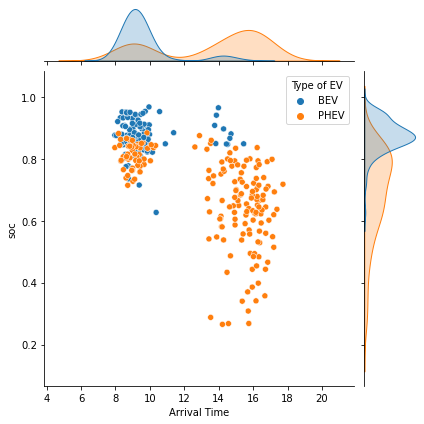

In [19]:
# Scatter plot between Plugin time and battery State of Charge
import seaborn as sns
#from pandas.plotting import register_matplotlib_converters
#register_matplotlib_converters()
#sns.set(font_scale=1.5, style="whitegrid")
dfprint= df_pt.copy()
dfprint["Arrival Time"]=dfprint["Arrival Time"].apply(lambda a: a.hour+a.minute/60.0)
sns.jointplot(data=dfprint, x="Arrival Time", y="soc", hue="Type of EV")

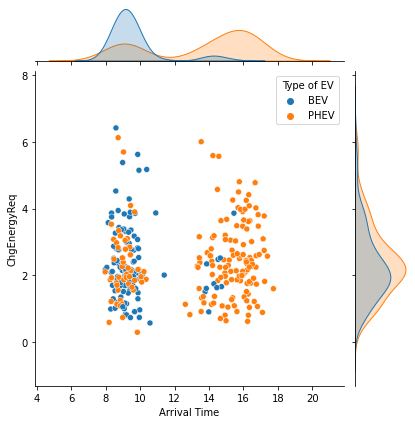

In [20]:
# Scatter plot between Plugin time and battery State of Charge
import seaborn as sns
#from pandas.plotting import register_matplotlib_converters
#register_matplotlib_converters()
#sns.set(font_scale=1.5, style="whitegrid")
dfprint= df_pt.copy()
dfprint["Arrival Time"]=dfprint["Arrival Time"].apply(lambda a: a.hour+a.minute/60.0+a.second/(60*60))
sns.jointplot(data=dfprint, x="Arrival Time", y="ChgEnergyReq",hue="Type of EV")

# Timeline for Each EV

In [21]:
dftimeline = df_pt.copy()
#DateTime to Minutes of day
dftimeline["Arrival Time"] = dftimeline["Arrival Time"].apply(
    lambda a: int((a.hour + a.minute / 60.0) * 60))
dftimeline["Charge Complete Time Level 1"] = dftimeline[
    "Charge Complete Time Level 1"].apply(
        lambda a: int((a.hour + a.minute / 60.0) * 60 ))
dftimeline["Charge Complete Time Level 2"] = dftimeline[
    "Charge Complete Time Level 2"].apply(
        lambda a: int((a.hour + a.minute / 60.0) * 60 ))
dftimeline["Charge Complete Time Level 3"] = dftimeline[
    "Charge Complete Time Level 3"].apply(
        lambda a: int((a.hour + a.minute / 60.0) * 60 ))

lev1_ch_times = np.zeros(((24 * 60), Total_EV_Number))  # Minutes in Day
lev2_ch_times = np.zeros(((24 * 60), Total_EV_Number))  # Minutes in Day
lev3_ch_times = np.zeros(((24 * 60), Total_EV_Number))  # Minutes in Day

temp = np.arange(dftimeline.shape[0])

for i in temp:
    lev1_ch_times[dftimeline["Arrival Time"][i]:dftimeline[
        "Charge Complete Time Level 1"][i],i] = dftimeline["ChgEnergyReq"][i]
    lev2_ch_times[dftimeline["Arrival Time"][i]:dftimeline[
        "Charge Complete Time Level 2"][i],i] = dftimeline["ChgEnergyReq"][i]
    lev3_ch_times[dftimeline["Arrival Time"][i]:dftimeline[
        "Charge Complete Time Level 3"][i],i] = dftimeline["ChgEnergyReq"][i]


<function matplotlib.pyplot.show(*args, **kw)>

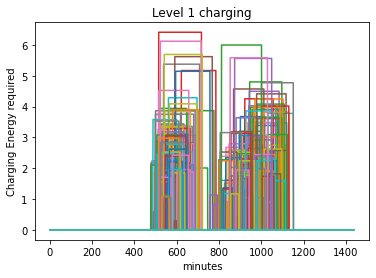

In [22]:
plt.figure()
plt.plot(lev1_ch_times)
plt.xlabel('minutes')
plt.ylabel('Charging Energy required')
plt.title('Level 1 charging')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

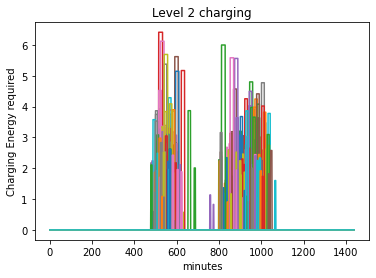

In [23]:
plt.figure()
plt.plot(lev2_ch_times)
plt.xlabel('minutes')
plt.ylabel('Charging Energy required')
plt.title('Level 2 charging')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

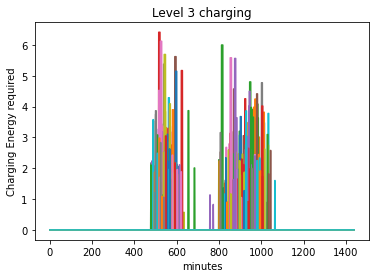

In [24]:
plt.figure()
plt.plot(lev3_ch_times)
plt.xlabel('minutes')
plt.ylabel('Charging Energy required')
plt.title('Level 3 charging')
plt.show

# Assuming All Vehicles are charged at Once

<function matplotlib.pyplot.show(*args, **kw)>

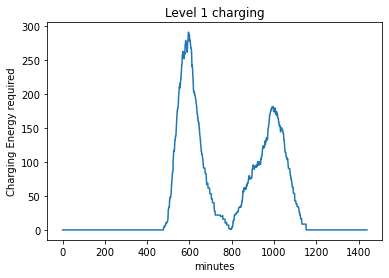

In [25]:
plt.figure()
plt.plot(np.sum(lev1_ch_times, axis=1))
plt.xlabel('minutes')
plt.ylabel('Charging Energy required')
plt.title('Level 1 charging')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

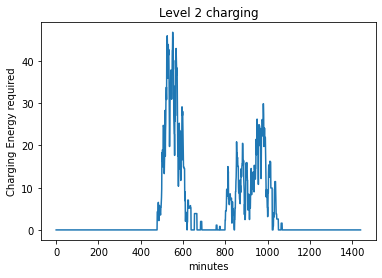

In [26]:
plt.figure()
plt.plot(np.sum(lev2_ch_times, axis=1))
plt.xlabel('minutes')
plt.ylabel('Charging Energy required')
plt.title('Level 2 charging')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

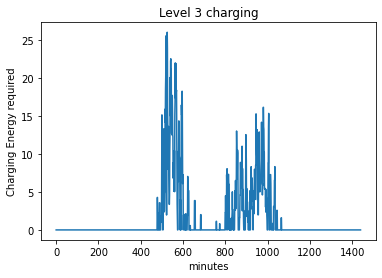

In [27]:
plt.figure()
plt.plot(np.sum(lev3_ch_times, axis=1))
plt.xlabel('minutes')
plt.ylabel('Charging Energy required')
plt.title('Level 3 charging')
plt.show

# Number of Vehicles Occupying Charging slot Simultaneously

<function matplotlib.pyplot.show(*args, **kw)>

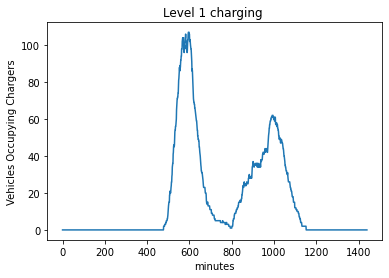

In [28]:
# For Level 1 Charger 
num_of_veh1= np.sum(np.where(lev1_ch_times > 0,1,0),axis=1)  
plt.figure()
plt.plot(num_of_veh1) 
plt.xlabel('minutes')
plt.ylabel('Vehicles Occupying Chargers') 
plt.title('Level 1 charging ') 
plt.show 

<function matplotlib.pyplot.show(*args, **kw)>

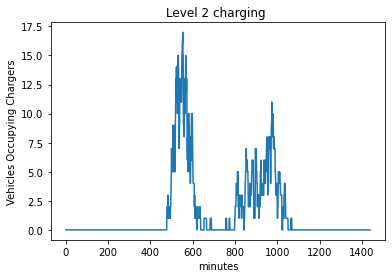

In [29]:
# For Level 2 Charger 
num_of_veh2= np.sum(np.where(lev2_ch_times > 0,1,0),axis=1)  
plt.figure()
plt.plot(num_of_veh2) 
plt.xlabel('minutes')
plt.ylabel('Vehicles Occupying Chargers') 
plt.title('Level 2 charging ') 
plt.show 

<function matplotlib.pyplot.show(*args, **kw)>

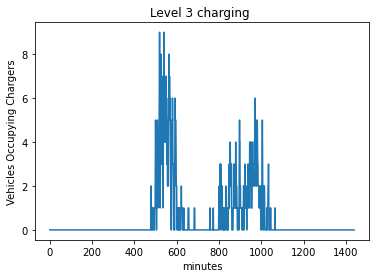

In [30]:
# For Level 3 Charger 
num_of_veh3= np.sum(np.where(lev3_ch_times > 0,1,0),axis=1)  
plt.figure()
plt.plot(num_of_veh3) 
plt.xlabel('minutes')
plt.ylabel('Vehicles Occupying Chargers') 
plt.title('Level 3 charging ') 
plt.show 

# Manual Queueing

In [75]:
test = np.array([[0, 0, 1, 1, 0, 0], [0, 0, 1, 1, 0, 0], [0, 0, 1, 1, 0, 0],
                 [0, 0, 1, 1, 0, 0]])

ToT_Char = 3
ToT_Time = 6
ToT_Char_Use_State = np.zeros((ToT_Char, ToT_Time))  # y = Charger x is time

#############################               np.roll
for i, ev in enumerate(test):
    print("For EV", i)
    for j, EV_ch_state in enumerate(ev):
        if EV_ch_state == 1:
            print("Charging", j)
            print(i, j)
            # Assign Charger
            for l, Charger in enumerate(ToT_Char_Use_State):
                print("For Charger", l)
                for m, Charger_state in enumerate(Charger):
                    if Charger_state == 0:
                        print(l, m)
                        ToT_Char_Use_State[l,j]=test[i,j]
                        print(ToT_Char_Use_State)

For EV 0
Charging 2
0 2
For Charger 0
0 0
[[0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
0 1
[[0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
0 3
[[0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
0 4
[[0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
0 5
[[0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
For Charger 1
1 0
[[0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
1 1
[[0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
1 3
[[0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
1 4
[[0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
1 5
[[0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
For Charger 2
2 0
[[0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
2 1
[[0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
2 3
[[0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
2 4
[[0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0.

In [97]:
test = np.array([[0, 0, 1, 1, 0, 0], [0, 0, 1, 1, 0, 0], [0, 0, 1, 1, 0, 0],
                 [0, 0, 1, 1, 0, 0]])

ToT_Char = 3
ToT_Time = 6
ToT_Char_Use_State = np.zeros((ToT_Char, ToT_Time))  # y = Charger x is time

#############################               np.roll
for i, ev in enumerate(test):
    print("For EV", i)
    for j, EV_ch_state in enumerate(ev):
        if EV_ch_state == 1:
            #print("Charging", j)
            #print(i, j)
            # Assign Charger
            for l, Charger in enumerate(ToT_Char_Use_State):
                print("For Charger", l)
                if Charger[j] == 0:
                    ToT_Char_Use_State[l,:]=test[i,:]
                    print(ToT_Char_Use_State)
                    print("Charger Found,,,,, Breaking")
                    break
                else:
                    print ("Congestion,,,,, Check Other Charger")
                    print (l)
                    # Check If All Charge Congested or not
                    if l == ToT_Char_Use_State.shape[0]-1:
                        print ("Total Congestion,,,,,,,,, No Charger Avalibile")
                        print ("Rolling EV", i, "by 1")
                        test[i]=np.roll(test[i],1)
                        # Recheck for this EV
                        
                    
            break

For EV 0
For Charger 0
[[0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
Charger Found,,,,, Breaking
For EV 1
For Charger 0
Congestion,,,,, Check Other Charger
0
For Charger 1
[[0. 0. 1. 1. 0. 0.]
 [0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
Charger Found,,,,, Breaking
For EV 2
For Charger 0
Congestion,,,,, Check Other Charger
0
For Charger 1
Congestion,,,,, Check Other Charger
1
For Charger 2
[[0. 0. 1. 1. 0. 0.]
 [0. 0. 1. 1. 0. 0.]
 [0. 0. 1. 1. 0. 0.]]
Charger Found,,,,, Breaking
For EV 3
For Charger 0
Congestion,,,,, Check Other Charger
0
For Charger 1
Congestion,,,,, Check Other Charger
1
For Charger 2
Congestion,,,,, Check Other Charger
2
Total Congestion,,,,,,,,, No Charger Avalibile
Rolling EV 3 by 1


In [125]:
test = np.array([[0, 0, 1, 1, 0, 0], [0, 0, 1, 1, 0, 0], [0, 0, 1, 1, 0, 0],
                 [0, 0, 1, 1, 0, 0]])

ToT_Char = 3
ToT_Time = 6
ToT_Char_Use_State = np.zeros((ToT_Char, ToT_Time))  # y = Charger x is time

#############################               np.roll
roll_en = 0

def check_vacant_charger(ev,i,test):
    #print("In Function")
    for j, EV_ch_state in enumerate(ev):
        if EV_ch_state == 1:
            #print("Charging", j)
            #print(i, j)
            # Assign Charger
            for l, Charger in enumerate(ToT_Char_Use_State):
                print("For Charger", l)
                if Charger[j] == 0:
                    ToT_Char_Use_State[l,:]+=test[i,:]
                    print(ToT_Char_Use_State)
                    print("Charger Found,,,,, Breaking")
                    test[i]=test[i]
                    roll_en=0
                    break
                else:
                    print ("Congestion,,,,, Check Other Charger")
                    #print (l)
                    # Check If All Charge Congested or not
                    if l == ToT_Char_Use_State.shape[0]-1:
                        print ("Total Congestion,,,,,,,,, No Charger Avalibile")
                        print ("Rolling EV", i, "by 1")
                        roll_en = 1
                        test[i]=np.roll(test[i],1)
                        return test[i], roll_en
                        # Recheck for this EV      
            break
    return test[i], roll_en


for i, ev in enumerate(test):
    print("For EV", i)
    test[i],  roll_en= check_vacant_charger(ev,i,test)
    print("Roll Enable",roll_en)
    while roll_en == 1:
        print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!Roll Had Been Enabled For EV", i)
        test[i],  roll_en= check_vacant_charger(ev,i,test)
        #roll_en= 0
### Rolling is OK.... The Algo Replaces the charger state but it is required to change only on the time needed
# Can add the Times ???????????????????????????????????

For EV 0
For Charger 0
[[0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
Charger Found,,,,, Breaking
Roll Enable 0
For EV 1
For Charger 0
Congestion,,,,, Check Other Charger
For Charger 1
[[0. 0. 1. 1. 0. 0.]
 [0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
Charger Found,,,,, Breaking
Roll Enable 0
For EV 2
For Charger 0
Congestion,,,,, Check Other Charger
For Charger 1
Congestion,,,,, Check Other Charger
For Charger 2
[[0. 0. 1. 1. 0. 0.]
 [0. 0. 1. 1. 0. 0.]
 [0. 0. 1. 1. 0. 0.]]
Charger Found,,,,, Breaking
Roll Enable 0
For EV 3
For Charger 0
Congestion,,,,, Check Other Charger
For Charger 1
Congestion,,,,, Check Other Charger
For Charger 2
Congestion,,,,, Check Other Charger
Total Congestion,,,,,,,,, No Charger Avalibile
Rolling EV 3 by 1
Roll Enable 1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!Roll Had Been Enabled For EV 3
For Charger 0
Congestion,,,,, Check Other Charger
For Charger 1
Congestion,,,,, Check Other Charger
For Charger 2
Congestion,,,,, Check Other Char

# Quequing Hours
Desgin algo which returns # of Arraival and # of Departures in That Hour

In [31]:
dftimeline_hours = df_pt.copy()
#DateTime to Minutes of day
dftimeline_hours["Arrival Time"] = dftimeline_hours["Arrival Time"].apply(
    lambda a: int((a.hour)))
dftimeline_hours["Charge Complete Time Level 1"] = dftimeline_hours[
    "Charge Complete Time Level 1"].apply(
        lambda a: int((a.hour)))
dftimeline_hours["Charge Complete Time Level 2"] = dftimeline_hours[
    "Charge Complete Time Level 2"].apply(
        lambda a: int((a.hour)))
dftimeline_hours["Charge Complete Time Level 3"] = dftimeline_hours[
    "Charge Complete Time Level 3"].apply(
        lambda a: int((a.hour)))

lev1_ch_times = np.zeros(((24), Total_EV_Number))  # Minutes in Day
lev2_ch_times = np.zeros(((24), Total_EV_Number))  # Minutes in Day
lev3_ch_times = np.zeros(((24), Total_EV_Number))  # Minutes in Day

temp = np.arange(dftimeline_hours.shape[0])

for i in temp:
    lev1_ch_times[dftimeline_hours["Arrival Time"][i]:dftimeline_hours[
        "Charge Complete Time Level 1"][i],i] = dftimeline_hours["ChgEnergyReq"][i]
    lev2_ch_times[dftimeline_hours["Arrival Time"][i]:dftimeline_hours[
        "Charge Complete Time Level 2"][i],i] = dftimeline_hours["ChgEnergyReq"][i]
    lev3_ch_times[dftimeline_hours["Arrival Time"][i]:dftimeline_hours[
        "Charge Complete Time Level 3"][i],i] = dftimeline_hours["ChgEnergyReq"][i]


In [32]:
dftimeline_hours

,Arrival Time,Charge Complete Time Level 1,Charge Complete Time Level 2,Charge Complete Time Level 3,Distance Traveled,Feeder,Time of Day,soc,essCurKwh,distance,ChgEnergyReq,Type of EV,Model
0,8,9,8,8,25.648947,Commercial,Morning,0.867992,18.227823,25.643317,2.352177,BEV,2016 CHEVROLET Spark EV
1,9,9,9,9,8.695379,Commercial,Morning,0.940092,19.741922,8.692093,0.838078,BEV,2016 CHEVROLET Spark EV
2,9,10,9,9,15.073906,Commercial,Morning,0.909494,19.099375,15.082921,1.480625,BEV,2016 CHEVROLET Spark EV
3,8,10,9,9,24.047010,Commercial,Morning,0.877676,18.431190,24.047431,2.148810,BEV,2016 CHEVROLET Spark EV
4,9,10,9,9,17.538659,Commercial,Morning,0.900752,18.915788,17.532083,1.664212,BEV,2016 CHEVROLET Spark EV
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,14,17,14,14,58.547992,Residential,Evening,0.267756,2.356255,58.544728,5.563745,PHEV,2017 Prius Prime
295,14,15,14,14,28.446567,Residential,Evening,0.537952,4.733980,28.450442,3.186020,PHEV,2017 Prius Prime
296,14,17,14,14,52.090731,Residential,Evening,0.265330,2.334905,52.085829,5.585095,PHEV,2017 Prius Prime
297,13,15,13,13,27.363326,Residential,Evening,0.541240,4.762910,27.357690,3.157090,PHEV,2017 Prius Prime


[0, 0, 0, 0, 0, 0, 0, 2, 66, 87, 8, 1, 2, 16, 33, 35, 42, 7, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 3, 46, 83, 26, 5, 3, 14, 28, 30, 39, 20, 2, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 56, 91, 15, 2, 2, 14, 29, 33, 47, 10, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 59, 94, 10, 1, 2, 15, 30, 35, 46, 7, 0, 0, 0, 0, 0, 0]


<function matplotlib.pyplot.show(*args, **kw)>

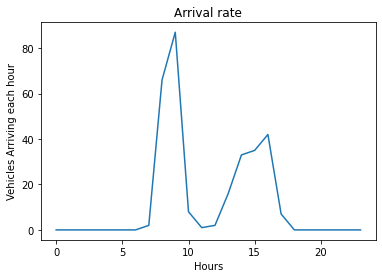

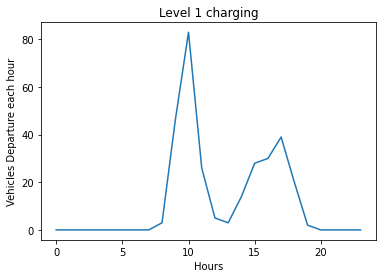

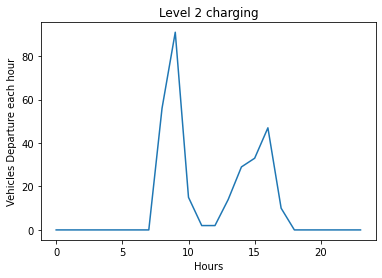

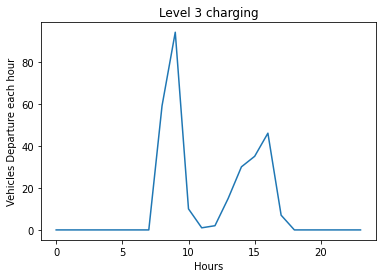

In [33]:
# Arrivals in hour

Tot_Arr_Hour = []

for h in np.arange(24):
    Tot_Arr_Hour.append(np.count_nonzero(dftimeline_hours["Arrival Time"] == h))

print(Tot_Arr_Hour)

#Departure in hours level 1
Tot_Dep_Hour_lvl1 = []

for h in np.arange(24):
    Tot_Dep_Hour_lvl1.append(np.count_nonzero(dftimeline_hours["Charge Complete Time Level 1"] == h))

print(Tot_Dep_Hour_lvl1)

#Departure in hours level 2
Tot_Dep_Hour_lvl2 = []

for h in np.arange(24):
    Tot_Dep_Hour_lvl2.append(np.count_nonzero(dftimeline_hours["Charge Complete Time Level 2"] == h))

print(Tot_Dep_Hour_lvl2)

Tot_Dep_Hour_lvl3 = []

for h in np.arange(24):
    Tot_Dep_Hour_lvl3.append(np.count_nonzero(dftimeline_hours["Charge Complete Time Level 3"] == h))

print(Tot_Dep_Hour_lvl3)

#Graphs for the number of vehicles arrival in hour and vehicle departure in hour for a day  
plt.figure()
plt.plot(Tot_Arr_Hour) 
plt.xlabel('Hours')
plt.ylabel('Vehicles Arriving each hour') 
plt.title('Arrival rate') 
plt.show 

plt.figure()
plt.plot(Tot_Dep_Hour_lvl1) 
plt.xlabel('Hours')
plt.ylabel('Vehicles Departure each hour') 
plt.title('Level 1 charging') 
plt.show 

plt.figure()
plt.plot(Tot_Dep_Hour_lvl2) 
plt.xlabel('Hours')
plt.ylabel('Vehicles Departure each hour') 
plt.title('Level 2 charging') 
plt.show

plt.figure()
plt.plot(Tot_Dep_Hour_lvl3) 
plt.xlabel('Hours')
plt.ylabel('Vehicles Departure each hour') 
plt.title('Level 3 charging') 
plt.show



# Queing Modelling for Charging Station 

In [34]:
# for arr,dep in zip(Tot_Arr_Hour,Tot_Dep_Hour_lvl1):
#     print(arr,dep)
#     if (arr > 0) & (dep > 0):
#         Lambda = arr  # nr of arrivals per hour
#         Mu = np.true_divide(dep, 3)   # nr of exits (services completed) per server per hour (divide total nr of exits by number of servers where we assume 4 servers per charging station)
#         # Create Arrival and Service processes and specify the number of servers
#         A = openqtsim.ArrivalProcess("E2", arr_rate=Lambda)
#         S = openqtsim.ServiceProcess("E2", srv_rate=Mu)
#         c = 3

#         # Create the queue object and use it to create a simulating object
#         q = openqtsim.Queue(A, S, c)
#         q.kendall_notation
#         %time
#         print('Start simulation of "{}" queue'.format(q.kendall_notation))
#         print('')

#         nr_arr = 10000
#         sim = openqtsim.Simulation(q)
#         sim.run(nr_arr)
#         sim.get_stats()
#         print('Input IAT: {:.4f}'.format(1/Lambda))
#         print('Input ST: {:.4f}'.format(1/Mu))

In [35]:
# Lambda = Tot_Arr_Hour  # nr of arrivals per hour
# Mu = np.true_divide(Tot_Dep_Hour_lvl1, 3)   # nr of exits (services completed) per server per hour (divide total nr of exits by number of servers where we assume 4 servers per charging station)
# # Create Arrival and Service processes and specify the number of servers
# A = openqtsim.ArrivalProcess("E2", arr_rate=Lambda)
# S = openqtsim.ServiceProcess("E2", srv_rate=Mu)
# c = 3

# # Create the queue object and use it to create a simulating object
# q = openqtsim.Queue(A, S, c)
# q.kendall_notation
# %%time
# print('Start simulation of "{}" queue'.format(q.kendall_notation))
# print('')

# nr_arr = 10_000
# sim = openqtsim.Simulation(q)
# sim.run(nr_arr)
# sim.get_stats()
# print('Input IAT: {:.4f}'.format(1/Lambda))
# print('Input ST: {:.4f}'.format(1/Mu))